## 02 - Data Visualisation: Cherry Leaf Health

### Objective

Answer Business Requirement 1:

- The client is interested in a study to visually differentiate a cherry leaf that is healthy from one that contains powdery mildew.

### Inputs

- inputs/cherry_leaves_split/train
- inputs/cherry_leaves_split/val
- inputs/cherry_leaves_split/test

### Outputs

- outputs/02_data_visualisation/image_shape.pkl
- Average and variability plots
- Difference image between class averages
- Image montage (per class)

### Set up

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.image import imread
from tensorflow.keras.preprocessing import image

sns.set_style("white")

### Set directories

In [2]:
print("Current working directory set.")

train_path = "C:/Users/Robert/mildew_cherry_detector/inputs/cherry_leaves_split/train"
val_path = "C:/Users/Robert/mildew_cherry_detector/cherry_leaves_split/val"
test_path = "C:/Users/Robert/mildew_cherry_detector/cherry_leaves_split/test"

version = "02_data_visualisation"
file_path = f"C:/Users/Robert/mildew_cherry_detector/outputs/{version}"
os.makedirs(file_path, exist_ok=True)

Current working directory set.


### Set label names

In [3]:
labels = os.listdir(train_path)
print("Labels in dataset:", labels)

Labels in dataset: ['healthy', 'powdery_mildew']


### Check image shape distribution

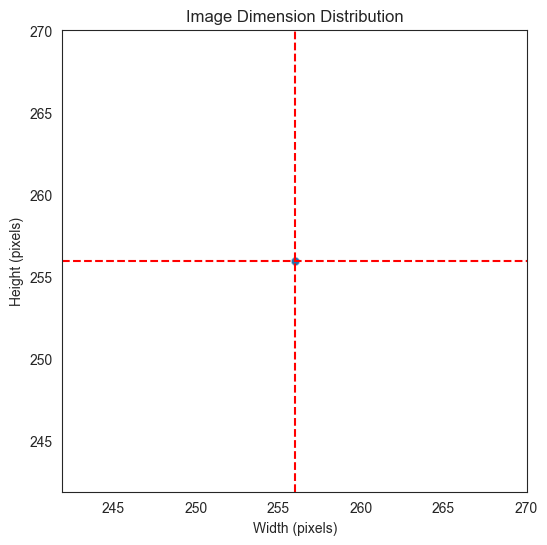

(256, 256, 3)

In [4]:
dim1, dim2 = [], []

for label in labels:
    for img_file in os.listdir(os.path.join(train_path, label)):
        img = imread(os.path.join(train_path, label, img_file))
        d1, d2, _ = img.shape
        dim1.append(d1)
        dim2.append(d2)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=dim2, y=dim1, alpha=0.3)
plt.axvline(np.mean(dim2), color='r', linestyle='--')
plt.axhline(np.mean(dim1), color='r', linestyle='--')
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.title("Image Dimension Distribution")
plt.show()

image_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 3)
joblib.dump(image_shape, f"{file_path}/image_shape.pkl")
image_shape

### Load images as array

In [5]:
def load_image_as_array(data_dir, new_size=(50, 50), n_images_per_label=30):
    X, y = [], []
    for label in os.listdir(data_dir):
        count = 0
        for img_file in os.listdir(os.path.join(data_dir, label)):
            if count >= n_images_per_label:
                break
            img = image.load_img(os.path.join(data_dir, label, img_file), target_size=new_size)
            arr = image.img_to_array(img) / 255.
            X.append(arr)
            y.append(label)
            count += 1
    return np.array(X), np.array(y)

X, y = load_image_as_array(train_path, new_size=image_shape[:2])
print("Image array shape:", X.shape)

Image array shape: (60, 256, 256, 3)


### Plot mean and variability images

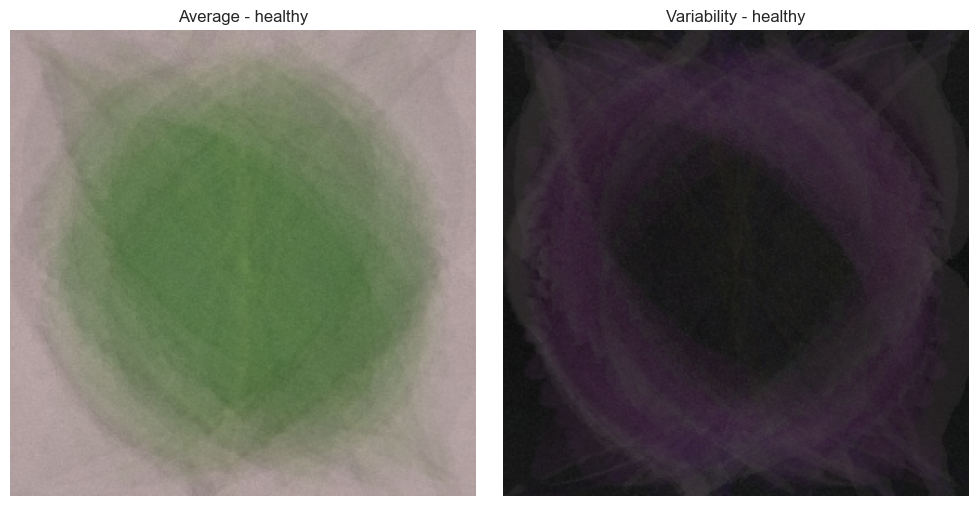

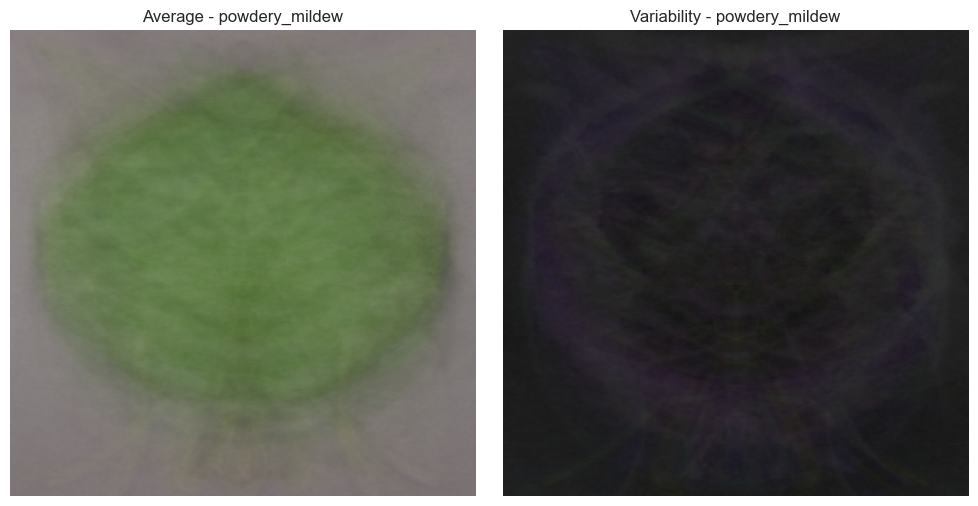

In [6]:
def plot_mean_variability(X, y):
    for label in np.unique(y):
        mask = y == label
        subset = X[mask]
        avg_img = np.mean(subset, axis=0)
        std_img = np.std(subset, axis=0)

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(avg_img)
        axes[0].set_title(f"Average - {label}")
        axes[0].axis("off")

        axes[1].imshow(std_img)
        axes[1].set_title(f"Variability - {label}")
        axes[1].axis("off")
        plt.tight_layout()
        plt.savefig(f"{file_path}/avg_var_{label}.png", dpi=150)
        plt.show()

plot_mean_variability(X, y)

### Difference between average images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


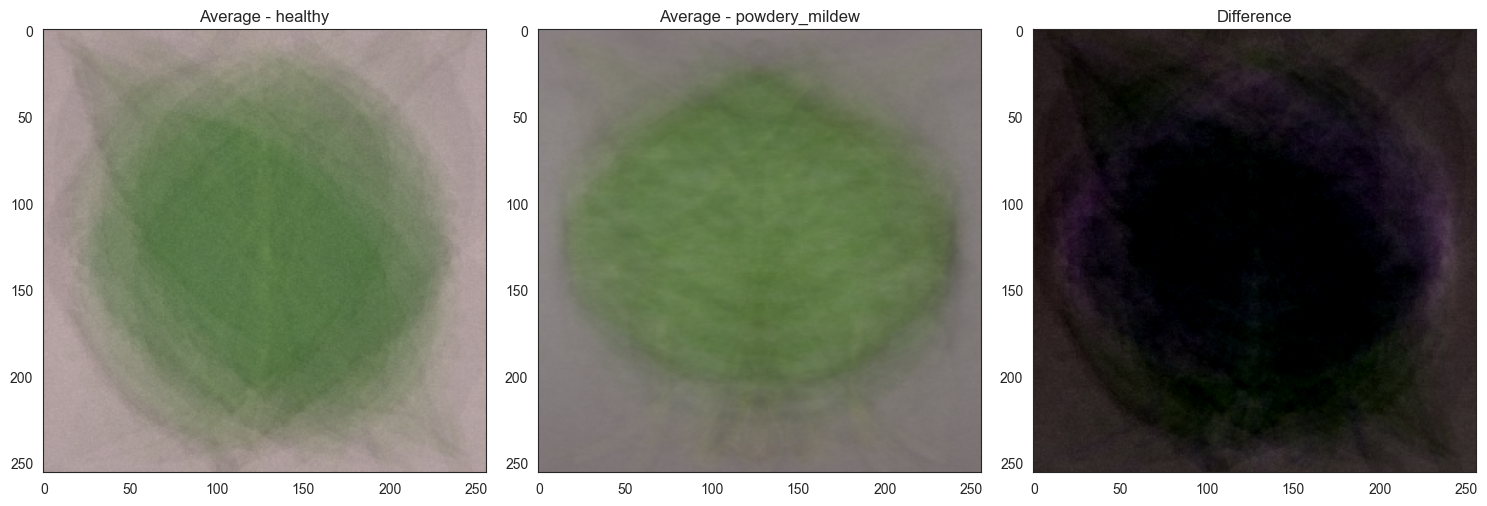

In [7]:
def subset_by_label(X, y, label):
    return X[y == label]

def plot_difference(X, y, label1, label2):
    X1 = subset_by_label(X, y, label1)
    X2 = subset_by_label(X, y, label2)
    avg1 = np.mean(X1, axis=0)
    avg2 = np.mean(X2, axis=0)
    diff = avg1 - avg2

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(avg1)
    ax[0].set_title(f"Average - {label1}")
    ax[1].imshow(avg2)
    ax[1].set_title(f"Average - {label2}")
    ax[2].imshow(diff)
    ax[2].set_title("Difference")
    plt.tight_layout()
    plt.savefig(f"{file_path}/avg_diff.png", dpi=150)
    plt.show()

plot_difference(X, y, label1="healthy", label2="powdery_mildew")

### Image Montage

Montage for: healthy


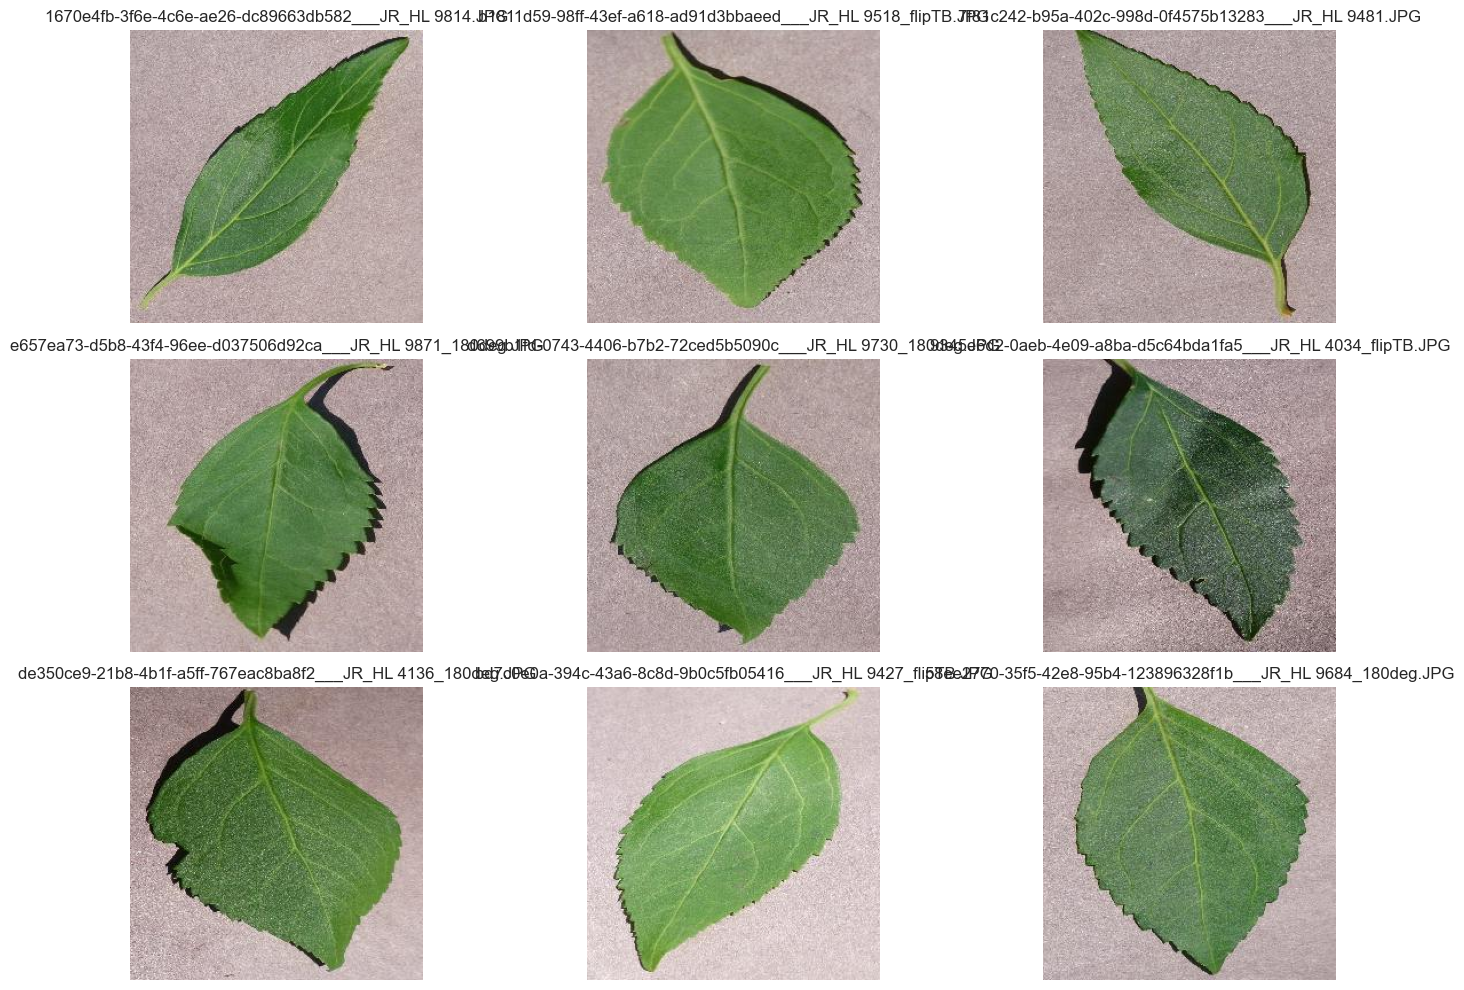



Montage for: powdery_mildew


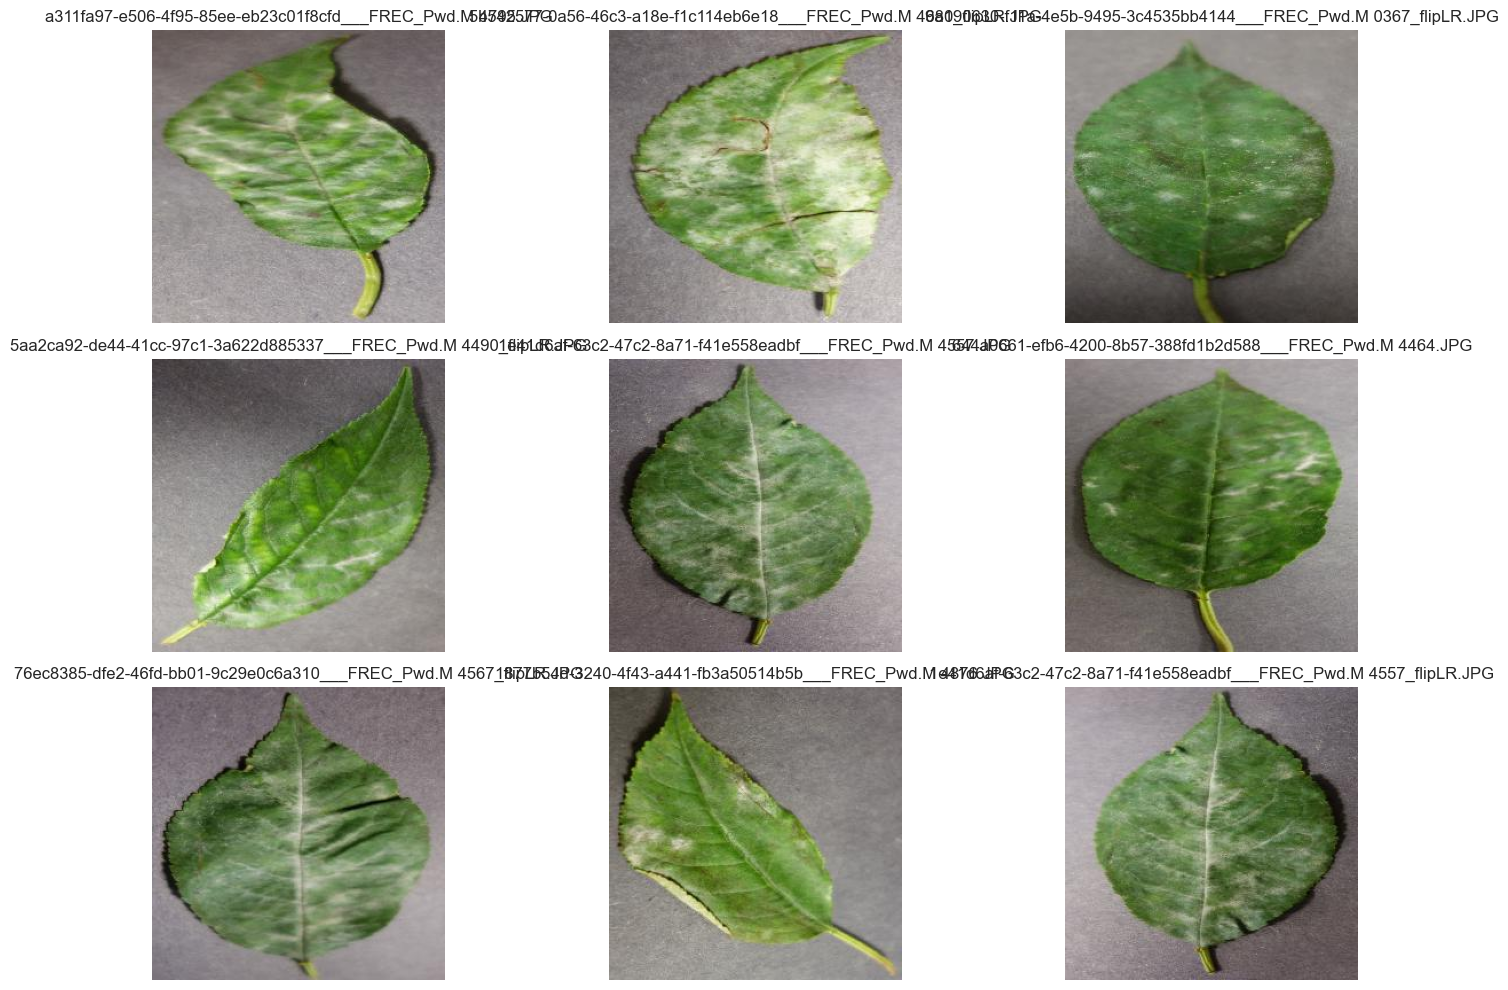

In [8]:
import itertools
import random

def image_montage(dir_path, label, nrows=3, ncols=3):
    img_list = os.listdir(os.path.join(dir_path, label))
    selected = random.sample(img_list, nrows * ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10))

    for (i, j), filename in zip(itertools.product(range(nrows), range(ncols)), selected):
        img = imread(os.path.join(dir_path, label, filename))
        axes[i, j].imshow(img)
        axes[i, j].set_title(f"{filename}")
        axes[i, j].axis("off")

    plt.tight_layout()
    plt.show()

for label in labels:
    print(f"Montage for: {label}")
    image_montage(train_path, label)
    print("\n")